# Initials

In [1]:
from __future__ import print_function
import matplotlib
matplotlib.use('Agg') 

import matplotlib.pyplot as plt
import numpy as np
from urllib import urlopen
import os
from IPython import get_ipython
import string
from scipy.signal import argrelextrema
import scipy.optimize as spo



def is_interactive(): # are we in jupyter ??
    import __main__ as main
    return not hasattr(main, '__file__')



if is_interactive():
    %matplotlib inline
    
   
baseURL = "http://golem.fjfi.cvut.cz/utils/data/" #global
#baseURL = "/golem/database/operation/shots/" #local

        

def mkdir(dir):  
    try:os.makedirs(dir) 
    except OSError:pass

FigSize=10,8



# Get data

In [6]:
#ShotNo=str(int(np.loadtxt('../../../../ShotNo' )))
#ShotNo=string.replace(os.path.basename(os.getcwd()),'#','') # get ShotNumber from discharge database where we currently are
ShotNo='0' #Last shot
#ShotNo='23172' 
ReferenceShot=ShotNumber=ShotNo # sorry'



#Plasma parameters
PlasmaStart=int(float(np.loadtxt(urlopen(baseURL+ShotNo+'/plasma_start')))*1e6) # in us
PlasmaEnd=int(float(np.loadtxt(urlopen(baseURL+ShotNo+'/plasma_end')))*1e6) # in us
ShotNumber=int(np.loadtxt(urlopen(baseURL+ShotNo+'/shotno')))

toroidal_field=np.loadtxt(urlopen(baseURL+str(ShotNumber)+'/toroidal_field'))
loop_voltage=np.loadtxt(urlopen(baseURL+str(ShotNumber)+'/loop_voltage'))
photodiode=np.loadtxt(urlopen(baseURL+str(ShotNumber)+'/photodiode'))




Reference discharge ...


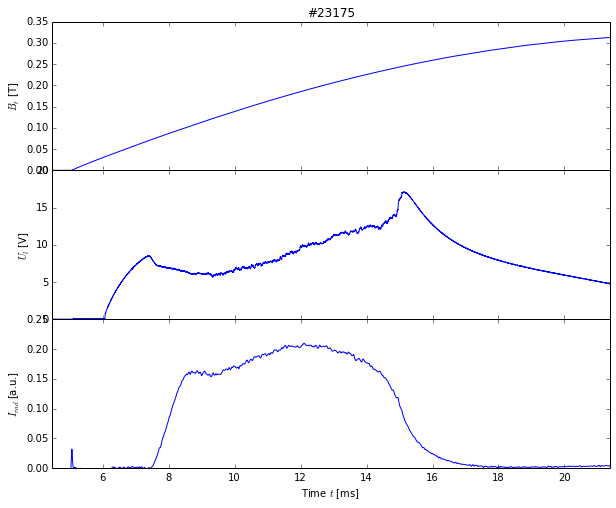

In [9]:
print("Reference discharge ...")

f = plt.figure(figsize=(20.0, 5.0))
f,ax = plt.subplots(3,sharex=True);plt.subplots_adjust(hspace=0.001)
f.set_size_inches(FigSize)
ax[0].set_title('#' + str(ShotNumber))
ax[0].plot(toroidal_field[0:,0]*1000,toroidal_field[0:,1]);ax[0].set_ylabel('$B_t$ [T]');ax[0].set_ylim(0,)
ax[1].plot(loop_voltage[0:,0]*1000,loop_voltage[0:,1]);ax[1].set_ylabel('$U_l$ [V]');ax[1].set_ylim(0,)
ax[2].plot(photodiode[0:,0]*1000,photodiode[0:,1]);ax[2].set_ylabel('$I_{rad}$ [a.u.]');ax[2].set_ylim(0,)
ax[2].set_xlim(PlasmaStart*0.6/1000,PlasmaEnd*1.4/1000)
#ax[2].set_xlim(0,30)
ax[2].set_xlabel('Time $t$ [ms]');
plt.savefig('BasicDiagnostics.jpg', bbox_inches='tight')
if is_interactive():plt.show();
plt.close();

# Finding sweeping intervals

In [4]:
print("html generation ...")

os.system('rm index.html');
fileid = open('index.html','a+')
fileid.write('<html><head><title>Tokamak GOLEM fusion promo</title>\
<style>\
</style>\
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\
<style></style>\
<script type="text/x-mathjax-config">MathJax.Hub.Config({tex2jax: {inlineMath: [[\'$\',\'$\'], [\'\\(\',\'\\)\']]}});</script>\
<script src="https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML"></script>\
</head><body><center>')
fileid.write('<h1>Tokamak GOLEM fusion promo</h1>')
fileid.write('<h2>Basic parameters</h2><ul>')
fileid.write('<li>Plasma start: '+str(float(np.loadtxt(urlopen(baseURL+ShotNo+'/plasma_start'))*1e3))+' ms</li>')
fileid.write('<li>Plasma end: '+str(float(np.loadtxt(urlopen(baseURL+ShotNo+'/plasma_end'))*1e3))+' ms</li>')
fileid.write('<li>Plasma life: '+str(float(np.loadtxt(urlopen(baseURL+ShotNo+'/plasma_life'))*1e3))+' ms</li>')
fileid.write('<li>Maximal (electron) temperature :~ '+str(int(float(np.loadtxt(urlopen(baseURL+ShotNo+'/electron_temperature_max'))*11600)/1000))+' 000 K</li>')
fileid.write('</ul>')
fileid.write('<h2>Basic diagnostics</h2>')
fileid.write('<img src="BasicDiagnostics.jpg">')
fileid.write('</center></body></html>')
fileid.close()

html generation ...
